In [8]:
#运行1
import pandas as pd
from mordred import Calculator, descriptors
from rdkit import Chem, DataStructs
from rdkit.Chem import AllChem
from rdkit.ML.Descriptors import MoleculeDescriptors
from rdkit.Chem import Descriptors
from rdkit.Chem.EState import Fingerprinter
from rdkit.Chem import PandasTools
from sklearn.preprocessing import StandardScaler 

# 读取数据表
data = pd.read_csv('MR20241113.csv')  # 替换为您的数据表路径和名称
pre_data = pd.read_csv('MR-20241016.csv') 
# 分割训练集和验证集
train_data = data[data['group'] == 'training']
test_data = data[data['group'] == 'test']

PandasTools.AddMoleculeColumnToFrame(train_data,'smiles','Molecule')
PandasTools.AddMoleculeColumnToFrame(test_data,'smiles','Molecule')
PandasTools.AddMoleculeColumnToFrame(pre_data,'smiles','Molecule')

calc = Calculator(descriptors, ignore_3D=True)
X_train = pd.DataFrame(calc.pandas(train_data['Molecule']))
X_test = pd.DataFrame(calc.pandas(test_data['Molecule']))
X_pre = pd.DataFrame(calc.pandas(pre_data['Molecule']))

data1=pd.concat([X_train,X_test])
data1=pd.concat([data1,X_pre])
data1=data1._get_numeric_data()
y_train=train_data[train_data.columns[4]].values
y_test=test_data[test_data.columns[4]].values
y_pre=pre_data[pre_data.columns[4]].values
X_train=pd.concat([train_data.iloc[:,5:9],data1.iloc[:53,:]],axis=1)
X_test=pd.concat([test_data.iloc[:,5:9],data1.iloc[53:66,:]],axis=1)
X_pre=pd.concat([pre_data.iloc[:,5:9],data1.iloc[66:,:]],axis=1)

E:\Anaconda\lib\site-packages\rdkit\Chem\PandasTools.py:416: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  frame[molCol] = frame[smilesCol].map(Chem.MolFromSmiles)
100%|████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:01<00:00,  4.40it/s]


In [2]:
import warnings
import pandas as pd
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import KFold 
from sklearn.model_selection import cross_val_score
import sklearn.metrics                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          
import numpy as np
from sklearn.datasets import load_boston
from sklearn.metrics import mean_squared_error
from hyperopt import hp, fmin, tpe, Trials

space = {
    'n_estimators': hp.choice('n_estimators',(100,200,300,400,500,600,700,800,900,1000)),
    'max_depth': hp.choice('max_depth', (1,2,3,4,5,6,7,8,9, 10)),
    'learning_rate': hp.choice('learning_rate', (0.0001,0.001,0.01,0.1,1)),
}

# Define the objective function
# Define the objective function
def objective(params):
    # Build the GradientBoostingRegressor model
    model = GradientBoostingRegressor(
        n_estimators=params['n_estimators'],
        max_depth=params['max_depth'],
        learning_rate=params['learning_rate'],
        random_state=42
    )

    # Calculate cross-validated RMSE
    cv_rmse = np.sqrt(-cross_val_score(model, X_train, y_train, cv=10, scoring='neg_mean_squared_error'))

    # Return the mean RMSE as the objective value
    return np.mean(cv_rmse)

# Run hyperparameter optimization
trials = Trials()
best = fmin(
    objective,
    space=space,
    algo=tpe.suggest,
    max_evals=10,
    trials=trials
)

# Output the best hyperparameters
print("Best Hyperparameters:")
print(best)

100%|██████████████████████████████████████████████████| 10/10 [06:14<00:00, 37.46s/it, best loss: 0.22378996715862862]
Best Hyperparameters:
{'learning_rate': 3, 'max_depth': 0, 'n_estimators': 6}


In [3]:
print("Best Hyperparameters:")
print(best)

Best Hyperparameters:
{'learning_rate': 3, 'max_depth': 0, 'n_estimators': 6}


Training Set - R2: 0.8090, MAE: 0.0914, RMSE: 0.1269
Validation Set - R2: 0.6660, MAE: 0.1417, RMSE: 0.2031


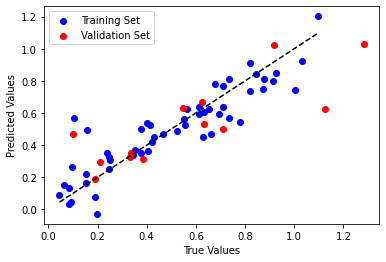

In [9]:
#运行2
import warnings
import pandas as pd
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import KFold 
from sklearn.model_selection import cross_val_score
import sklearn.metrics                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          
import numpy as np
from sklearn.datasets import load_boston
from sklearn.metrics import mean_squared_error
from hyperopt import hp, fmin, tpe, Trials
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split
model=GradientBoostingRegressor(learning_rate=0.1,max_depth=1, n_estimators=700,random_state=42)

model.fit(X_train, y_train)

# 在训练集和验证集上进行预测
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# 计算 R2 分数
r2_train = r2_score(y_train, y_train_pred)
r2_val = r2_score(y_test, y_test_pred)

# 计算 MAE 和 MSE
mae_train = mean_absolute_error(y_train, y_train_pred)
mae_val = mean_absolute_error(y_test, y_test_pred)
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
rmse_val = np.sqrt(mean_squared_error(y_test, y_test_pred))

# 打印结果
print("Training Set - R2: {:.4f}, MAE: {:.4f}, RMSE: {:.4f}".format(r2_train, mae_train, rmse_train))
print("Validation Set - R2: {:.4f}, MAE: {:.4f}, RMSE: {:.4f}".format(r2_val, mae_val, rmse_val))

# 绘制散点图
plt.scatter(y_train, y_train_pred, color='blue', label='Training Set')
plt.scatter(y_test, y_test_pred, color='red', label='Validation Set')
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], color='black', linestyle='--')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()
#确认结果别用错数据集

In [11]:
#运行3
y_pre_pred = model.predict(X_pre)
pd.DataFrame(y_pre, y_pre_pred).to_csv("MR-pre-GBR.csv")

In [5]:
pd.DataFrame(y_train, y_train_pred).to_csv("train-GBR-MR.csv")
pd.DataFrame(y_test, y_test_pred).to_csv("test-GBR-MR.csv")